In [1]:
from fugue_notebook import setup

setup()

from dask_sql.integrations import fugue
#import fugue_blazing

<IPython.core.display.Javascript object>

In [2]:
%%fsql
airports = 
    LOAD CSV "/tmp/airports.csv"
    COLUMNS airport_id:long,name:str,city:str,country:str,iata:str,icao:str,lat:double,lng:double,alt:long,timezone:str,dst:str,type:str,source:str
YIELD DATAFRAME
PRINT

airlines = 
    LOAD CSV "/tmp/airlines.csv"
    COLUMNS airline_id:long,name:str,alias:str,iata:str,icao:str,callsign:str,country:str,active:str
YIELD DATAFRAME
PRINT

,airport_id,name,city,country,iata,icao,lat,lng,alt,timezone,dst,type,source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport
5,6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10,U,Pacific/Port_Moresby,airport
6,7,Narsarsuaq Airport,Narssarssuaq,Greenland,UAK,BGBW,61.160500,-45.425999,112,-3,E,America/Godthab,airport
7,8,Godthaab / Nuuk Airport,Godthaab,Greenland,GOH,BGGH,64.190903,-51.678101,283,-3,E,America/Godthab,airport
8,9,Kangerlussuaq Airport,Sondrestrom,Greenland,SFJ,BGSF,67.012222,-50.711603,165,-3,E,America/Godthab,airport
9,10,Thule Air Base,Thule,Greenland,THU,BGTL,76.531197,-68.703201,251,-4,E,America/Thule,airport


,airline_id,name,alias,iata,icao,callsign,country,active
0,-1,Unknown,\N,-,None,\N,\N,Y
1,1,Private flight,\N,-,None,None,None,Y
2,2,135 Airways,\N,None,GNL,GENERAL,United States,N
3,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,\N,None,WYT,None,United Kingdom,N
5,5,213 Flight Unit,\N,None,TFU,None,Russia,N
6,6,223 Flight Unit State Airline,\N,None,CHD,CHKALOVSK-AVIA,Russia,N
7,7,224th Flight Unit,\N,None,TTF,CARGO UNIT,Russia,N
8,8,247 Jet Ltd,\N,None,TWF,CLOUD RUNNER,United Kingdom,N
9,9,3D Aviation,\N,None,SEC,SECUREX,United States,N


In [5]:
airports.native

,airport_id,name,city,country,iata,icao,lat,lng,alt,timezone,dst,type,source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7693,14106,Rogachyovo Air Base,Belaya,Russia,\N,ULDA,71.616699,52.478298,272,\N,\N,\N,airport
7694,14107,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,51.849998,107.737999,1670,\N,\N,\N,airport
7695,14108,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,58.625000,31.385000,85,\N,\N,\N,airport
7696,14109,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,\N,\N,\N,airport


In [6]:
import pandas as pd
from triad import Schema
from typing import List, Iterable, Dict, Any

df = pd.read_parquet("https://s3.amazonaws.com/bsql/data/air_transport/flight_ontime_2020-01.parquet")
schema = Schema(df.iloc[: , :-1])
print(schema)

YEAR:long,QUARTER:long,MONTH:long,DAY_OF_MONTH:long,DAY_OF_WEEK:long,FL_DATE:str,MKT_UNIQUE_CARRIER:str,MKT_CARRIER_FL_NUM:str,OP_UNIQUE_CARRIER:str,TAIL_NUM:str,OP_CARRIER_FL_NUM:str,ORIGIN_AIRPORT_ID:long,ORIGIN_AIRPORT_SEQ_ID:long,ORIGIN_CITY_MARKET_ID:long,ORIGIN:str,ORIGIN_STATE_ABR:str,ORIGIN_WAC:long,DEST_AIRPORT_ID:long,DEST_AIRPORT_SEQ_ID:long,DEST_CITY_MARKET_ID:long,DEST:str,DEST_STATE_ABR:str,DEST_WAC:long,CRS_DEP_TIME:str,DEP_TIME:str,DEP_DELAY:double,DEP_DELAY_NEW:double,DEP_DEL15:double,DEP_DELAY_GROUP:double,DEP_TIME_BLK:str,TAXI_OUT:double,WHEELS_OFF:str,WHEELS_ON:str,TAXI_IN:double,CRS_ARR_TIME:str,ARR_TIME:str,ARR_DELAY:double,ARR_DELAY_NEW:double,ARR_DEL15:double,ARR_DELAY_GROUP:double,ARR_TIME_BLK:str,CANCELLED:double,CANCELLATION_CODE:str,DIVERTED:double,DUP:str,CRS_ELAPSED_TIME:double,ACTUAL_ELAPSED_TIME:double,AIR_TIME:double,DISTANCE:double,CARRIER_DELAY:double,WEATHER_DELAY:double,NAS_DELAY:double,SECURITY_DELAY:double,LATE_AIRCRAFT_DELAY:double


In [7]:
import pandas as pd

files = [[f"https://s3.amazonaws.com/bsql/data/air_transport/flight_ontime_2020-0{i}.parquet"] for i in [1,2,3,4,5]]
files_df = pd.DataFrame(files, columns=["path"])

files_df

,path
0,https://s3.amazonaws.com/bsql/data/air_transpo...
1,https://s3.amazonaws.com/bsql/data/air_transpo...
2,https://s3.amazonaws.com/bsql/data/air_transpo...
3,https://s3.amazonaws.com/bsql/data/air_transpo...
4,https://s3.amazonaws.com/bsql/data/air_transpo...


In [8]:
from typing import Dict, Any, List, Iterable
import os
from shutil import rmtree

def download(files:pd.DataFrame,path:str) -> None:
    os.makedirs(path,exist_ok=True)
    for file in files["path"]:
        fn = os.path.basename(file)
        npath = os.path.join(path,fn)
        print(npath)
        pd.read_parquet(file)[schema.names].to_parquet(npath)
        
download(files_df.head(2), "/tmp/1.parquet")

/tmp/1.parquet/flight_ontime_2020-01.parquet
/tmp/1.parquet/flight_ontime_2020-02.parquet


In [9]:
%%fsql dask
OUTTRANSFORM files_df 
EVEN PREPARTITION ROWCOUNT 
USING download(path="/tmp/flights.parquet")

/tmp/flights.parquet/flight_ontime_2020-02.parquet/tmp/flights.parquet/flight_ontime_2020-01.parquet
/tmp/flights.parquet/flight_ontime_2020-03.parquet
/tmp/flights.parquet/flight_ontime_2020-04.parquet
/tmp/flights.parquet/flight_ontime_2020-05.parquet



In [10]:
%%fsql dask
LOAD "/tmp/flights.parquet"
PRINT ROWCOUNT
SELECT FL_DATE,CRS_DEP_TIME,DEP_TIME,DEP_DELAY LIMIT 50 PERSIST
YIELD DATAFRAME AS test

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,OP_UNIQUE_CARRIER,TAIL_NUM,...,DUP,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2020,1,1,1,3,2020-01-01,WN,5888,WN,N951WN,...,N,95.0,122.0,74.0,363.0,8.0,0.0,27.0,0.0,33.0
1,2020,1,1,1,3,2020-01-01,WN,6276,WN,N467WN,...,N,90.0,92.0,71.0,363.0,NaN,NaN,NaN,NaN,NaN
2,2020,1,1,1,3,2020-01-01,WN,4598,WN,N7885A,...,N,70.0,68.0,57.0,333.0,NaN,NaN,NaN,NaN,NaN
3,2020,1,1,1,3,2020-01-01,WN,4761,WN,N551WN,...,N,75.0,75.0,63.0,333.0,NaN,NaN,NaN,NaN,NaN
4,2020,1,1,1,3,2020-01-01,WN,5162,WN,N968WN,...,N,80.0,67.0,57.0,333.0,NaN,NaN,NaN,NaN,NaN
5,2020,1,1,1,3,2020-01-01,WN,5684,WN,N7856A,...,N,75.0,80.0,57.0,333.0,NaN,NaN,NaN,NaN,NaN
6,2020,1,1,1,3,2020-01-01,WN,6152,WN,N7735A,...,N,80.0,72.0,62.0,333.0,NaN,NaN,NaN,NaN,NaN
7,2020,1,1,1,3,2020-01-01,WN,1679,WN,N405WN,...,N,85.0,73.0,66.0,390.0,0.0,0.0,0.0,7.0,40.0
8,2020,1,1,1,3,2020-01-01,WN,3479,WN,N489WN,...,N,85.0,100.0,73.0,390.0,NaN,NaN,NaN,NaN,NaN
9,2020,1,1,1,3,2020-01-01,WN,4069,WN,N7708E,...,N,80.0,84.0,71.0,390.0,NaN,NaN,NaN,NaN,NaN


In [11]:
#schema: *,ts:datetime,day_of_year:int,hour_of_week:int
def generate_time_metrics(df:pd.DataFrame) -> pd.DataFrame:
    date = df["FL_DATE"].astype(str) + " "+df["CRS_DEP_TIME"].astype(str)
    df["ts"]=pd.to_datetime(date, format="%Y-%m-%d %H%M")
    df["day_of_year"]=df["ts"].dt.dayofyear
    df["hour_of_week"]=df["ts"].dt.dayofweek*24+df["ts"].dt.hour
    return df

generate_time_metrics(test.as_pandas())

,FL_DATE,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,ts,day_of_year,hour_of_week
0,2020-01-01,1810,1851,41.0,2020-01-01 18:10:00,1,66
1,2020-01-01,1150,1146,-4.0,2020-01-01 11:50:00,1,59
2,2020-01-01,2020,2016,-4.0,2020-01-01 20:20:00,1,68
3,2020-01-01,1340,1350,10.0,2020-01-01 13:40:00,1,61
4,2020-01-01,0915,0916,1.0,2020-01-01 09:15:00,1,57
5,2020-01-01,0600,0602,2.0,2020-01-01 06:00:00,1,54
6,2020-01-01,1620,1624,4.0,2020-01-01 16:20:00,1,64
7,2020-01-01,1505,1604,59.0,2020-01-01 15:05:00,1,63
8,2020-01-01,1230,1225,-5.0,2020-01-01 12:30:00,1,60
9,2020-01-01,0740,0740,0.0,2020-01-01 07:40:00,1,55


In [12]:
%%fsql dask
LOAD "/tmp/flights.parquet"
TRANSFORM USING generate_time_metrics
SELECT 
    ts, 
    day_of_year, 
    hour_of_week, 
    ORIGIN AS origin,
    DEST AS dest,
    OP_UNIQUE_CARRIER AS carrier,
    DEP_DELAY AS delay
PERSIST 
YIELD DATAFRAME AS flights
PRINT ROWCOUNT

,ts,day_of_year,hour_of_week,origin,dest,carrier,delay
0,2020-01-01 18:10:00,1,66,ONT,SFO,WN,41.0
1,2020-01-01 11:50:00,1,59,ONT,SFO,WN,-4.0
2,2020-01-01 20:20:00,1,68,ONT,SJC,WN,-4.0
3,2020-01-01 13:40:00,1,61,ONT,SJC,WN,10.0
4,2020-01-01 09:15:00,1,57,ONT,SJC,WN,1.0
5,2020-01-01 06:00:00,1,54,ONT,SJC,WN,2.0
6,2020-01-01 16:20:00,1,64,ONT,SJC,WN,4.0
7,2020-01-01 15:05:00,1,63,ONT,SMF,WN,59.0
8,2020-01-01 12:30:00,1,60,ONT,SMF,WN,-5.0
9,2020-01-01 07:40:00,1,55,ONT,SMF,WN,0.0


In [13]:
import matplotlib.pyplot as plt

def plot(df:pd.DataFrame,x:Any,y:Any,sort:Any,**kwargs) -> None:
    df.sort_values(sort).plot(x=x,y=y,**kwargs)
    plt.show()

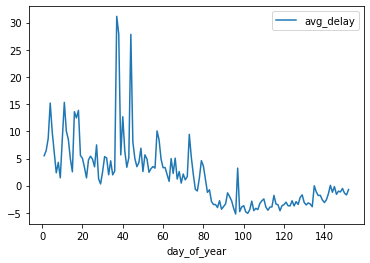

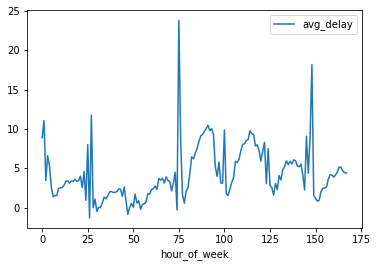

In [14]:
%%fsql dask
SELECT day_of_year, AVG(delay) AS avg_delay FROM flights GROUP BY day_of_year
OUTPUT USING plot(x="day_of_year",y="avg_delay",sort="day_of_year")

SELECT hour_of_week, AVG(delay) AS avg_delay FROM flights GROUP BY hour_of_week
OUTPUT USING plot(x="hour_of_week",y="avg_delay",sort="hour_of_week")

In [15]:
%%fsql dask
info = 
    SELECT ts
        , carrier
        , B.name AS carrier_name
        , origin
        , C.name AS origin_name      
        , C.country AS origin_country      
        , C.lat AS origin_lat       
        , C.lng AS origin_lng    
        , dest
        , D.name AS dest_name
        , D.country AS dest_country    
        , D.lat AS dest_lat       
        , D.lng AS dest_lng    
        , delay
    FROM flights AS A
    LEFT OUTER JOIN airlines AS B
        ON A.carrier = B.iata
    LEFT OUTER JOIN airports AS C
        ON A.origin = C.iata
    LEFT OUTER JOIN airports AS D
        ON A.dest = D.iata
    WHERE C.lat IS NOT NULL AND C.lng IS NOT NULL
        AND D.lat IS NOT NULL AND D.lng IS NOT NULL
PERSIST YIELD DATAFRAME
PRINT ROWCOUNT

SELECT * WHERE origin_country = dest_country AND origin_country = 'United States'
PERSIST YIELD DATAFRAME AS info_us
PRINT ROWCOUNT

,ts,carrier,carrier_name,origin,origin_name,origin_country,origin_lat,origin_lng,dest,dest_name,dest_country,dest_lat,dest_lng,delay
0,2020-05-17 20:05:00,G4,Allegiant Air,PGD,Charlotte County Airport,United States,26.9202,-81.990501,CHS,Charleston Air Force Base-International Airport,United States,32.898602,-80.040497,NaN
1,2020-05-31 20:06:00,G4,Allegiant Air,PGD,Charlotte County Airport,United States,26.9202,-81.990501,CHS,Charleston Air Force Base-International Airport,United States,32.898602,-80.040497,-16.0
2,2020-05-24 20:02:00,G4,Allegiant Air,PGD,Charlotte County Airport,United States,26.9202,-81.990501,CHS,Charleston Air Force Base-International Airport,United States,32.898602,-80.040497,NaN
3,2020-05-21 19:08:00,G4,Allegiant Air,PGD,Charlotte County Airport,United States,26.9202,-81.990501,CHS,Charleston Air Force Base-International Airport,United States,32.898602,-80.040497,NaN
4,2020-05-28 20:06:00,G4,Allegiant Air,PGD,Charlotte County Airport,United States,26.9202,-81.990501,CHS,Charleston Air Force Base-International Airport,United States,32.898602,-80.040497,60.0
5,2020-05-14 06:20:00,G4,Allegiant Air,PGD,Charlotte County Airport,United States,26.9202,-81.990501,CHS,Charleston Air Force Base-International Airport,United States,32.898602,-80.040497,NaN
6,2020-04-12 19:37:00,G4,Allegiant Air,PGD,Charlotte County Airport,United States,26.9202,-81.990501,CHS,Charleston Air Force Base-International Airport,United States,32.898602,-80.040497,NaN
7,2020-04-09 19:37:00,G4,Allegiant Air,PGD,Charlotte County Airport,United States,26.9202,-81.990501,CHS,Charleston Air Force Base-International Airport,United States,32.898602,-80.040497,NaN
8,2020-04-05 19:37:00,G4,Allegiant Air,PGD,Charlotte County Airport,United States,26.9202,-81.990501,CHS,Charleston Air Force Base-International Airport,United States,32.898602,-80.040497,NaN
9,2020-04-02 19:37:00,G4,Allegiant Air,PGD,Charlotte County Airport,United States,26.9202,-81.990501,CHS,Charleston Air Force Base-International Airport,United States,32.898602,-80.040497,NaN


,ts,carrier,carrier_name,origin,origin_name,origin_country,origin_lat,origin_lng,dest,dest_name,dest_country,dest_lat,dest_lng,delay
0,2020-05-17 20:05:00,G4,Allegiant Air,PGD,Charlotte County Airport,United States,26.9202,-81.990501,CHS,Charleston Air Force Base-International Airport,United States,32.898602,-80.040497,NaN
1,2020-05-31 20:06:00,G4,Allegiant Air,PGD,Charlotte County Airport,United States,26.9202,-81.990501,CHS,Charleston Air Force Base-International Airport,United States,32.898602,-80.040497,-16.0
2,2020-05-24 20:02:00,G4,Allegiant Air,PGD,Charlotte County Airport,United States,26.9202,-81.990501,CHS,Charleston Air Force Base-International Airport,United States,32.898602,-80.040497,NaN
3,2020-05-21 19:08:00,G4,Allegiant Air,PGD,Charlotte County Airport,United States,26.9202,-81.990501,CHS,Charleston Air Force Base-International Airport,United States,32.898602,-80.040497,NaN
4,2020-05-28 20:06:00,G4,Allegiant Air,PGD,Charlotte County Airport,United States,26.9202,-81.990501,CHS,Charleston Air Force Base-International Airport,United States,32.898602,-80.040497,60.0
5,2020-05-14 06:20:00,G4,Allegiant Air,PGD,Charlotte County Airport,United States,26.9202,-81.990501,CHS,Charleston Air Force Base-International Airport,United States,32.898602,-80.040497,NaN
6,2020-04-12 19:37:00,G4,Allegiant Air,PGD,Charlotte County Airport,United States,26.9202,-81.990501,CHS,Charleston Air Force Base-International Airport,United States,32.898602,-80.040497,NaN
7,2020-04-09 19:37:00,G4,Allegiant Air,PGD,Charlotte County Airport,United States,26.9202,-81.990501,CHS,Charleston Air Force Base-International Airport,United States,32.898602,-80.040497,NaN
8,2020-04-05 19:37:00,G4,Allegiant Air,PGD,Charlotte County Airport,United States,26.9202,-81.990501,CHS,Charleston Air Force Base-International Airport,United States,32.898602,-80.040497,NaN
9,2020-04-02 19:37:00,G4,Allegiant Air,PGD,Charlotte County Airport,United States,26.9202,-81.990501,CHS,Charleston Air Force Base-International Airport,United States,32.898602,-80.040497,NaN


In [16]:
def plot_bar(df:pd.DataFrame,x:Any,y:Any,sort:Any,**kwargs) -> None:
    df.sort_values(sort).plot.bar(x=x,y=y,**kwargs)
    plt.show()

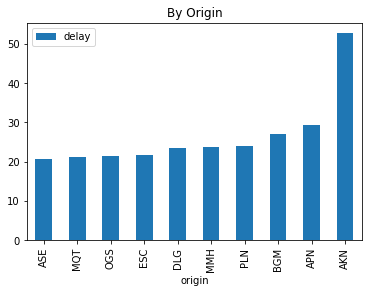

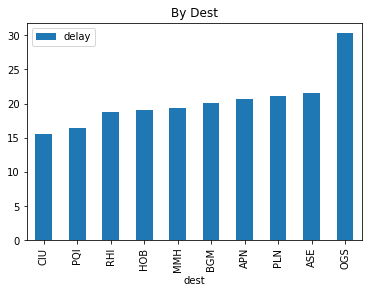

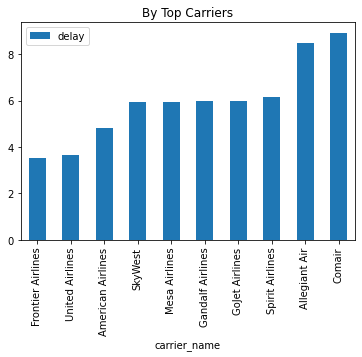

In [17]:
%%fsql dask
SELECT origin, AVG(delay) AS delay FROM info_us GROUP BY origin
SELECT * ORDER BY delay DESC LIMIT 10
OUTPUT USING plot_bar(x="origin",y="delay",sort="delay", title="By Origin")

SELECT dest, AVG(delay) AS delay FROM info_us GROUP BY dest
SELECT * ORDER BY delay DESC LIMIT 10
OUTPUT USING plot_bar(x="dest",y="delay",sort="delay", title="By Dest")

top = 
    SELECT carrier, COUNT(*) AS ct 
    FROM info_us GROUP BY carrier 
    ORDER BY ct DESC LIMIT 20
    PERSIST YIELD DATAFRAME
    
info_top = 
    SELECT info_us.* FROM info_us INNER JOIN top ON info_us.carrier = top.carrier

SELECT carrier_name, AVG(delay) AS delay FROM info_top GROUP BY carrier_name
SELECT * ORDER BY delay DESC LIMIT 10
OUTPUT USING plot_bar(x="carrier_name",y="delay",sort="delay", title="By Top Carriers")


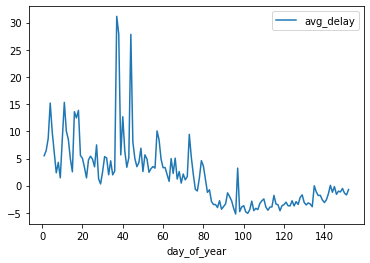

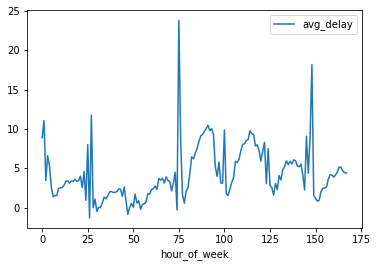

_9 _State.RUNNING -> _State.FAILED  invalid literal for int() with base 10: 'Goroka Airport'


ValueError: invalid literal for int() with base 10: 'Goroka Airport'

In [18]:
%%fsql dask
airports = 
    LOAD CSV "/tmp/airports.csv"
    COLUMNS airport_id:long,name:str,city:str,country:str,iata:str,icao:str,lat:double,lng:double,alt:long,timezone:str,dst:str,type:str,source:str

airlines = 
    LOAD CSV "/tmp/airlines.csv"
    COLUMNS airline_id:long,name:str,alias:str,iata:str,icao:str,callsign:str,country:str,active:str

LOAD "/tmp/flights.parquet"
TRANSFORM USING generate_time_metrics
flights = 
    SELECT 
        ts, 
        day_of_year, 
        hour_of_week, 
        ORIGIN AS origin,
        DEST AS dest,
        OP_UNIQUE_CARRIER AS carrier,
        DEP_DELAY AS delay
    PERSIST 
    
SELECT day_of_year, AVG(delay) AS avg_delay FROM flights GROUP BY day_of_year
OUTPUT USING plot(x="day_of_year",y="avg_delay",sort="day_of_year")

SELECT hour_of_week, AVG(delay) AS avg_delay FROM flights GROUP BY hour_of_week
OUTPUT USING plot(x="hour_of_week",y="avg_delay",sort="hour_of_week")

    
info = 
    SELECT ts
        , carrier
        , B.name AS carrier_name
        , origin
        , C.name AS origin_name      
        , C.country AS origin_country      
        , C.lat AS origin_lat       
        , C.lng AS origin_lng    
        , dest
        , D.name AS dest_name
        , D.country AS dest_country    
        , D.lat AS dest_lat       
        , D.lng AS dest_lng    
        , delay
    FROM flights AS A
    LEFT OUTER JOIN airlines AS B
        ON A.carrier = B.iata
    LEFT OUTER JOIN airports AS C
        ON A.origin = C.iata
    LEFT OUTER JOIN airports AS D
        ON A.dest = D.iata
    WHERE C.lat IS NOT NULL AND C.lng IS NOT NULL
        AND D.lat IS NOT NULL AND D.lng IS NOT NULL

info_us = 
    SELECT * WHERE origin_country = dest_country AND origin_country = 'United States'
    PERSIST
    
SELECT origin, AVG(delay) AS delay FROM info_us GROUP BY origin
SELECT * ORDER BY delay DESC LIMIT 10
OUTPUT USING plot_bar(x="origin",y="delay",sort="delay", title="By Origin")

SELECT dest, AVG(delay) AS delay FROM info_us GROUP BY dest
SELECT * ORDER BY delay DESC LIMIT 10
OUTPUT USING plot_bar(x="dest",y="delay",sort="delay", title="By Dest")

top = 
    SELECT carrier, COUNT(*) AS ct 
    FROM info_us GROUP BY carrier 
    ORDER BY ct DESC LIMIT 20
    
info_top = 
    SELECT info_us.* FROM info_us INNER JOIN top ON info_us.carrier = top.carrier

SELECT carrier_name, AVG(delay) AS delay FROM info_top GROUP BY carrier_name
SELECT * ORDER BY delay DESC LIMIT 10
OUTPUT USING plot_bar(x="carrier_name",y="delay",sort="delay", title="By Top Carriers")

